1.Preparación del **Dataset**

1.1.Dividimos en dos partes: una para entrenar el modelo y la otra para probarlo.

In [221]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv('./cybersecurity_attacks_train.csv', sep=',')
#X = data.drop(columns=['Action Taken'])
#y = data['Action Taken']





2.Análisis exploratorio: Usamos .head(), .describe(), y .dtypes para tener una visión general de los datos y sus tipos.

In [222]:

data = pd.read_csv('./cybersecurity_attacks_train.csv', sep=',')
data.head().T

,0,1,2,3,4
Timestamp,2022-02-17 14:24:26,2022-07-13 21:26:07,2022-01-24 01:34:26,2021-04-14 13:07:30,2021-06-22 06:13:38
Source IP Address,139.232.58.134,195.53.177.17,191.82.198.113,171.111.225.76,202.30.71.118
Destination IP Address,136.109.30.205,172.5.127.240,34.110.129.184,179.126.37.238,201.42.20.225
Source Port,36518,20699,34446,57213,61497
Destination Port,34215,55651,9209,46209,8702
Protocol,UDP,ICMP,ICMP,ICMP,ICMP
Packet Length,303,803,1247,335,325
Packet Type,Control,Control,Data,Control,Control
Traffic Type,DNS,HTTP,HTTP,HTTP,DNS
Payload Data,Ipsa omnis quasi quisquam perferendis. Reicien...,Et suscipit dolorem consequatur. Dolorem aliqu...,Omnis necessitatibus non laudantium velit cumq...,Voluptates cumque eveniet at eum et. Laborum d...,Odio cumque laborum architecto architecto alia...


In [223]:
data.describe(include="all").fillna("-")

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,32000,32000,32000,32000.0,32000.0,32000,32000.0,32000,32000,32000,...,32000,32000,32000,32000,32000,32000,16099,16033,15914,32000
unique,31997,32000,32000,-,-,3,-,2,3,32000,...,3,3,26990,25820,3,8570,16099,1,1,2
top,2022-06-11 14:28:15,139.232.58.134,136.109.30.205,-,-,ICMP,-,Control,HTTP,Ipsa omnis quasi quisquam perferendis. Reicien...,...,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",199.215.97.242,Log Data,Alert Data,Firewall
freq,2,1,1,-,-,10759,-,16208,10698,1,...,10823,10759,6,30,10737,16,1,16033,15914,16108
mean,-,-,-,33054.046313,33094.061719,-,780.355781,-,-,-,...,-,-,-,-,-,-,-,-,-,-
std,-,-,-,18539.802186,18550.474464,-,415.778929,-,-,-,...,-,-,-,-,-,-,-,-,-,-
min,-,-,-,1027.0,1024.0,-,64.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
25%,-,-,-,17000.5,17038.0,-,420.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
50%,-,-,-,33013.0,32955.0,-,781.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
75%,-,-,-,48932.0,49122.5,-,1142.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [224]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

Preparación de los datos:división train/test

In [225]:
from sklearn.model_selection import train_test_split 
# Dividir el dataset en conjunto de entrenamiento y prueba 
train, test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data['Action Taken'], random_state=42)
# Separar características y etiquetas para train y test 
X_train = train.drop(columns=['Action Taken']) 
y_train = train['Action Taken'] 
X_test = test.drop(columns=['Action Taken']) 
y_test = test['Action Taken']

 2.1.Distribución de la variable objetivo

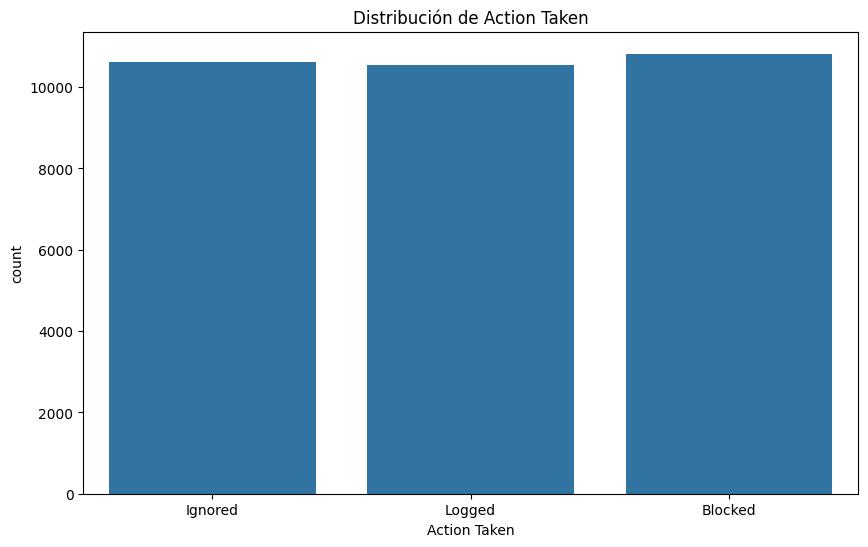

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Action Taken', data=data)
plt.title('Distribución de Action Taken')
plt.show()

2.1.Visualizamos la distribución de la variable objetivo para entender la frecuencia de cada clase.

2.2. Outliers:Utilizamos boxplots para detectar valores atípicos en nuestras características numéricas.

Text(0.5, 1.0, 'Distribución de características numéricas')

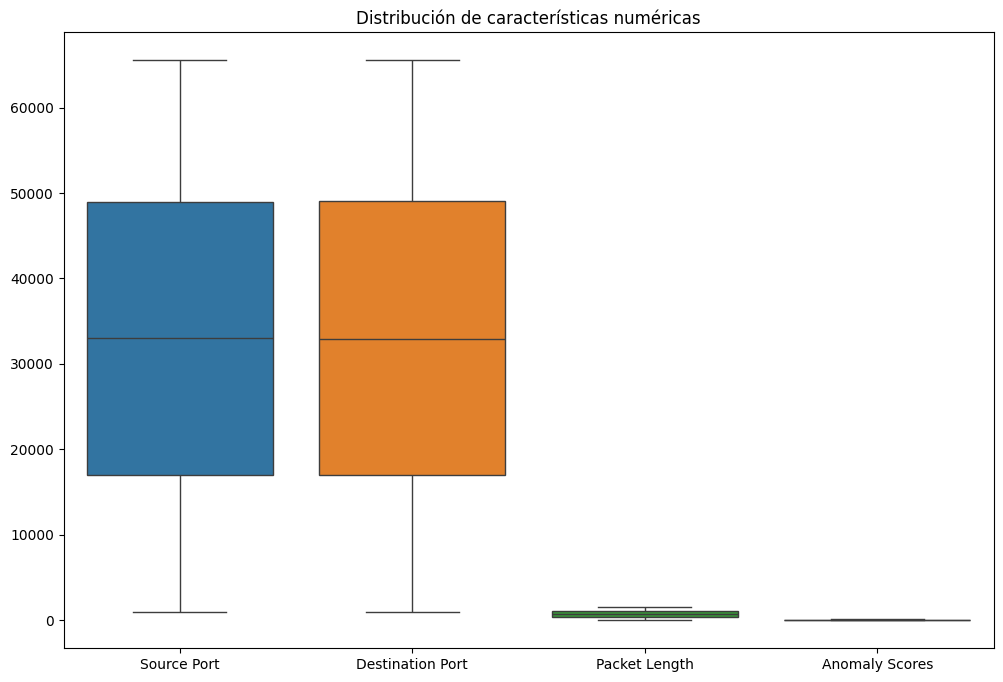

In [227]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X.select_dtypes(include=[np.number]))
plt.title('Distribución de características numéricas')


 2.3.Matriz de Correlación:  Usamos una matriz de correlación para entender las relaciones significativas entre las variables

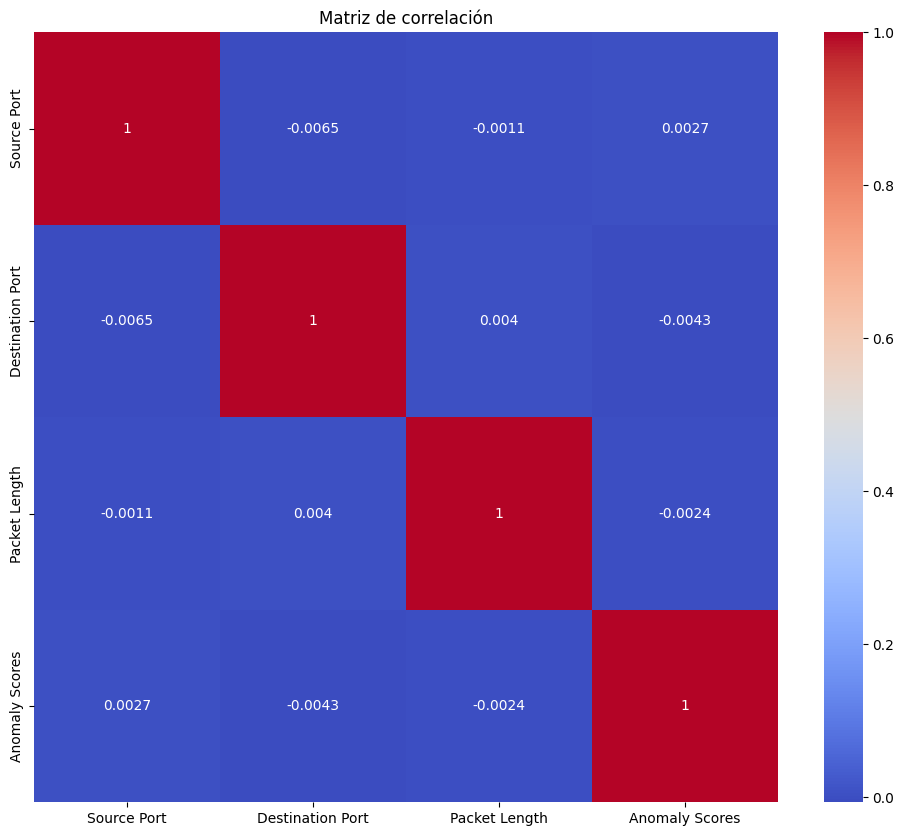

In [228]:
plt.figure(figsize=(12, 10))
correlation_matrix = X.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

3.Preprocesamiento

3.1.Eliminación de valores nulos.

In [229]:
# Separar las columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=[np.number]).columns 
categorical_cols = X_train.select_dtypes(exclude=([np.number])).columns 
# Imputar valores nulos en columnas numéricas 
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median()) 
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].median()) 
# Imputar valores nulos en columnas categóricas con el modo
X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: col.fillna(col.mode()[0])) 
X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: col.fillna(col.mode()[0])) 
# Verificar valores nulos nuevamente 
print(X_train.isnull().sum()) 
print(X_test.isnull().sum())

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly

3.2.Selección de características

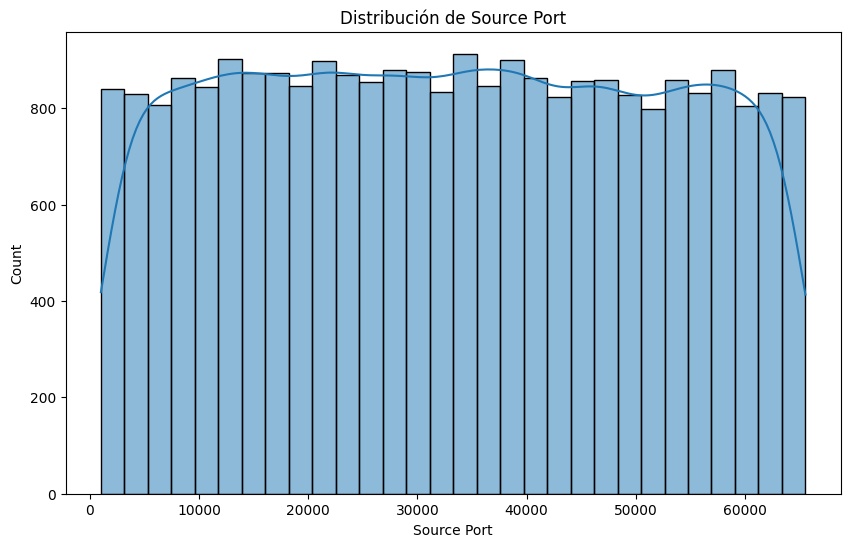

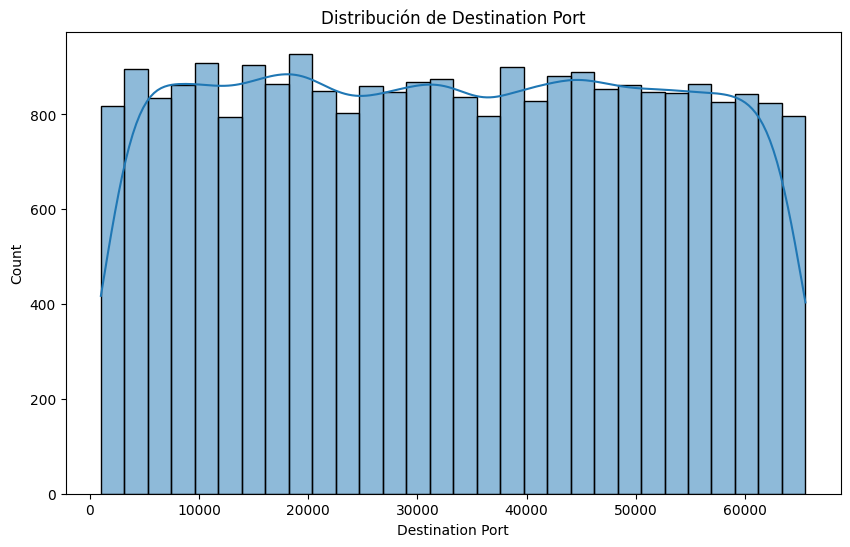

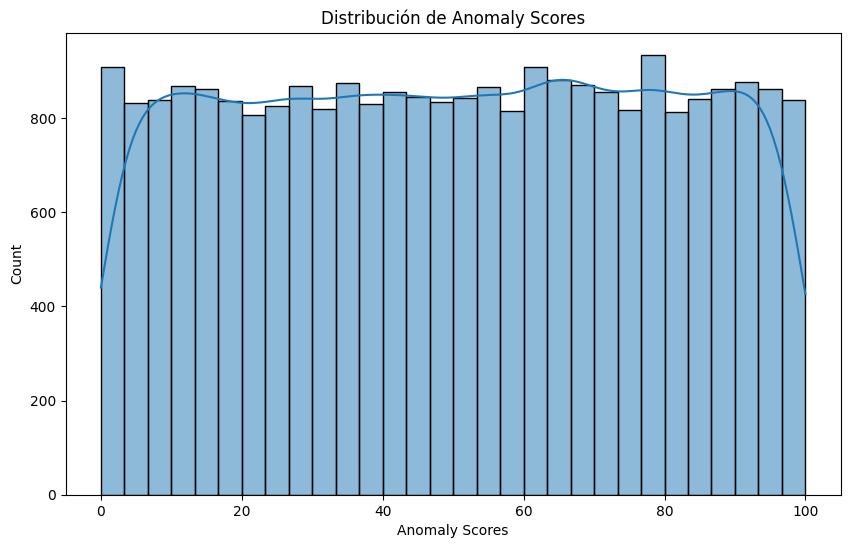

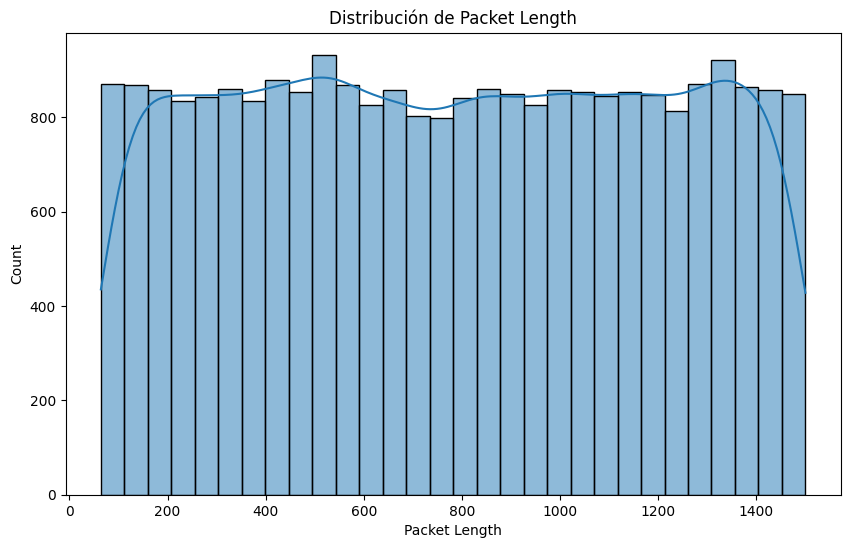

In [230]:
from sklearn.ensemble import RandomForestClassifier 
# Asegurarse de que todas las características son numéricas
X_numeric = X_train.select_dtypes(include=([np.number])) 
model_rf = RandomForestClassifier(random_state=42) 
model_rf.fit(X_numeric, y_train)
importances = model_rf.feature_importances_ 
features = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': importances}) 
features = features.sort_values(by='Importance', ascending=False) 
selected_features = features['Feature'].head(10).tolist() 
X_selected_train = X_numeric[selected_features]
# Visualización de las características más importantes 
features_to_plot = features['Feature'].head(5).tolist() 
for feature in features_to_plot: 
    plt.figure(figsize=(10, 6)) 
    sns.histplot(X_train[feature], kde=True) 
    plt.title(f'Distribución de {feature}') 
    plt.show()

4.Modelado y Evaluación del modelo

4.1.Escalada de datos y Cross Validation

In [231]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
scaler = StandardScaler() 
X_scaled_train = scaler.fit_transform(X_selected_train) 
X_scaled_test = scaler.transform(X_test[selected_features]) 
model = LogisticRegression(random_state=42, max_iter=200) 
cv_scores = cross_val_score(model, X_scaled_train, y_train, cv=5) 
print("Cross-validation scores:", cv_scores) 
model.fit(X_scaled_train, y_train) 
y_pred = model.predict(X_scaled_test)
print(classification_report(y_test,y_pred))

Cross-validation scores: [0.33789062 0.32910156 0.33496094 0.33828125 0.33222656]
              precision    recall  f1-score   support

     Blocked       0.34      0.58      0.43      2165
     Ignored       0.32      0.23      0.27      2124
      Logged       0.33      0.18      0.24      2111

    accuracy                           0.33      6400
   macro avg       0.33      0.33      0.31      6400
weighted avg       0.33      0.33      0.31      6400



In [232]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
cv_scores_gb = cross_val_score(model_gb, X_scaled_train, y_train, cv=5)
print("Cross-validation scores (Gradient Boosting):", cv_scores_gb)

Cross-validation scores (Gradient Boosting): [0.34238281 0.33007812 0.33457031 0.34199219 0.34394531]


5.Evaluación del modelo

Conclusión:

In [234]:
print("Conclusión:El modelo de regresión logística muestra una precisión de alrededor del 33-34% basado en la validación cruzada,además, la inclusión de un train/test split nos permite asegurar que el modelo no solo funciona bien en validación cruzada, sino que también generaliza adecuadamente a datos completamente nuevos. Estos resultados nos indican que posiblemente se pueda  mejorar,tal vez no se ha seleccionado las mejores características para la variable objetivo, o puede que las características disponibles en el dataset no sean lo suficientemente predictivas o simplemente este dataset este diseñado para que intentemos conseguir un modelo mejor a fuerza de ensayo/error,como si de un reto se tratase. ")


Conclusión:El modelo de regresión logística muestra una precisión de alrededor del 33-34% basado en la validación cruzada,además, la inclusión de un train/test split nos permite asegurar que el modelo no solo funciona bien en validación cruzada, sino que también generaliza adecuadamente a datos completamente nuevos. Estos resultados nos indican que posiblemente se pueda  mejorar,tal vez no se ha seleccionado las mejores características para la variable objetivo, o puede que las características disponibles en el dataset no sean lo suficientemente predictivas o simplemente este dataset este diseñado para que intentemos conseguir un modelo mejor a fuerza de ensayo/error,como si de un reto se tratase. 
